<a href="https://colab.research.google.com/github/mfmarlonferrari/datasetsForML/blob/main/IA_Aula_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
#Carrega os dados na memória em formato DataFrame
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
dados = pd.read_csv('https://raw.githubusercontent.com/mfmarlonferrari/datasetsForML/main/winequality-red.csv')

In [6]:
#visualiza os dados
dados.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

### Análise Exploratória - Features

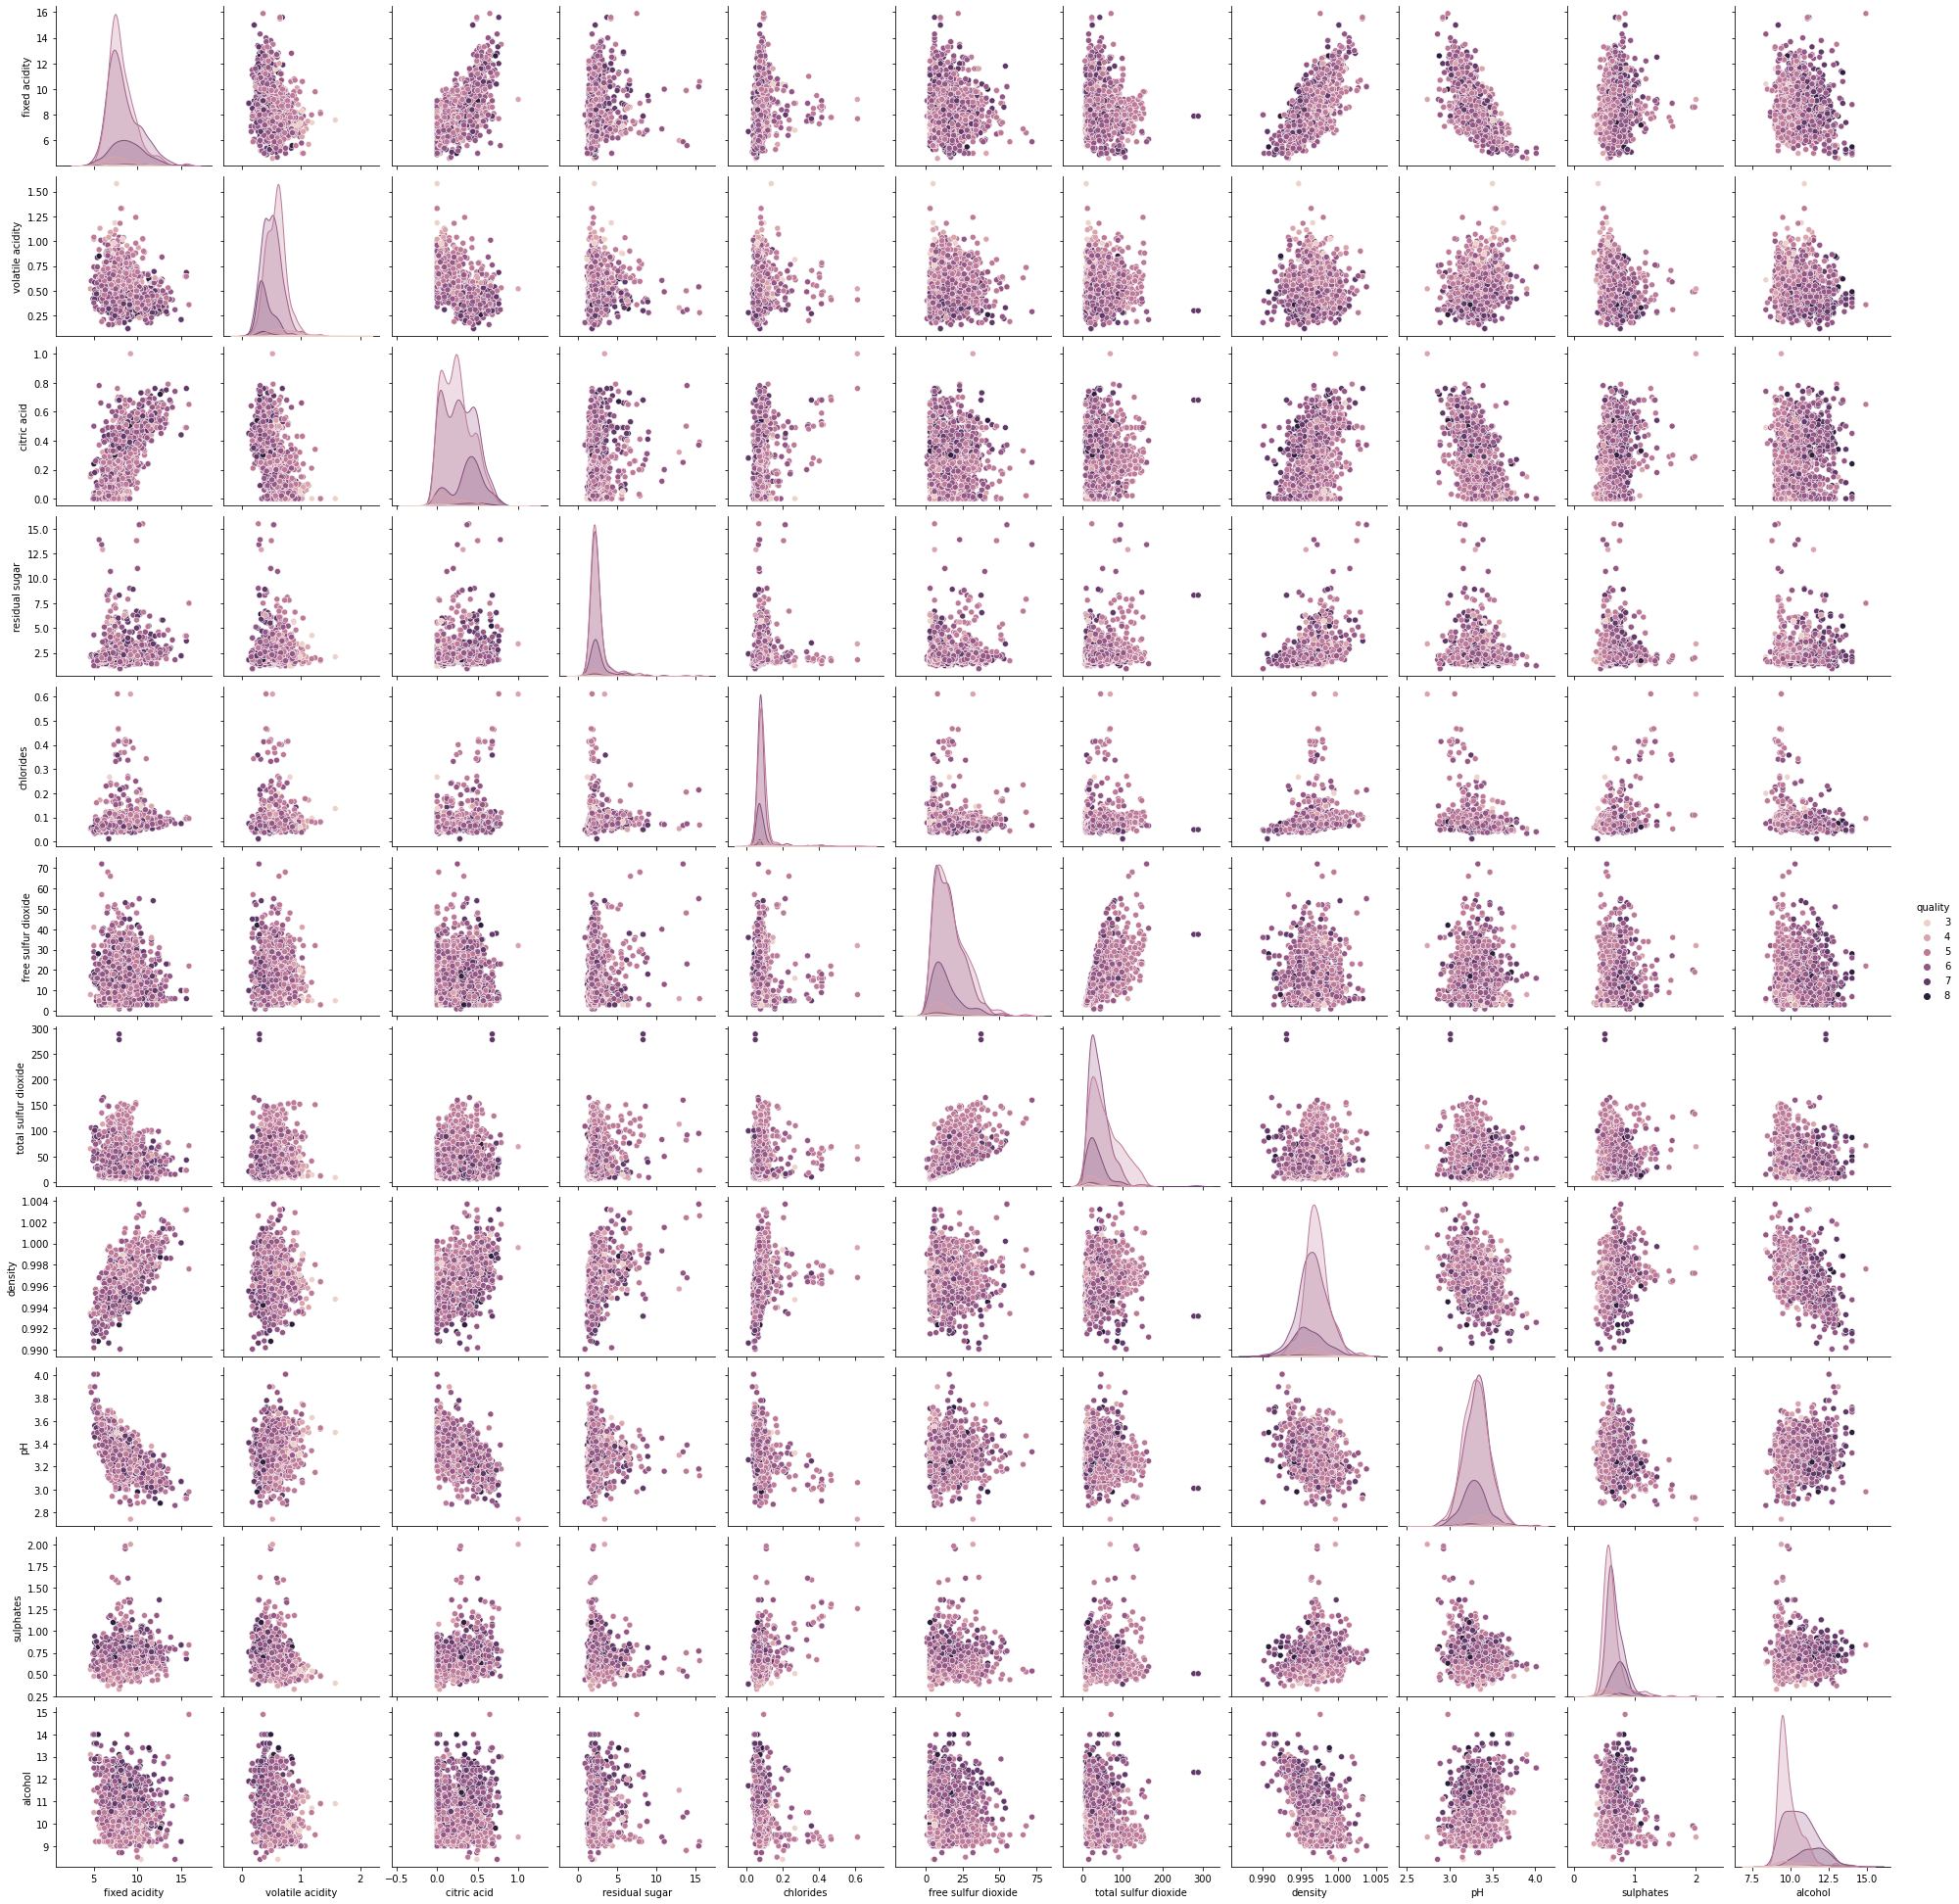

In [4]:
import seaborn as sns

sns.pairplot(dados, hue='quality')

### Modelagem preditiva

#### Alvo y - Variáveis X

In [9]:
X = dados.drop('quality', axis=1)
y = dados['quality']

#### Divisão de Treino e Teste

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
493            8.7             0.690         0.31  ...  3.48       0.74     11.6
354            6.1             0.210         0.40  ...  3.25       0.59     11.9
342           10.9             0.390         0.47  ...  3.30       0.75      9.8
834            8.8             0.685         0.26  ...  3.32       0.47      9.4
705            8.4             1.035         0.15  ...  3.37       0.49      9.9

[5 rows x 11 columns]

In [13]:
y_test[:5]

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

#### Modelo de Regressão Linear

In [14]:
from sklearn import linear_model 

#Instancia o modelo de Regressão Linear
modelo = linear_model.LinearRegression()

#### Fitting
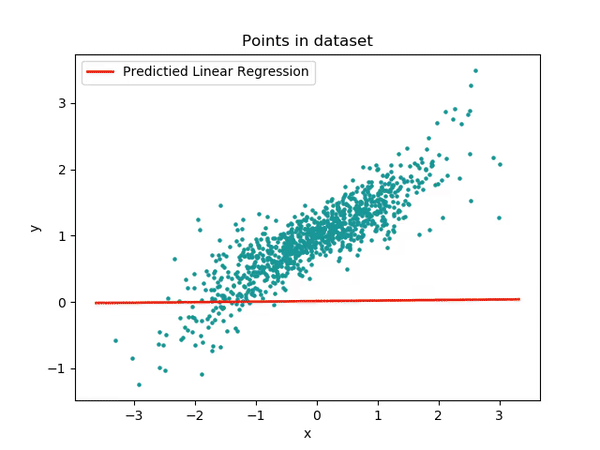

In [15]:
#ISSO IRA CRIAR OVERFITTING
#modelo.fit(X, y)

#CONJUNTO DE TREINO
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Parâmetros do modelo treinado

In [18]:
print('W: \n', modelo.coef_)
print('b: \n', modelo.intercept_)

W: 
 [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]
b: 
 14.35510519576194


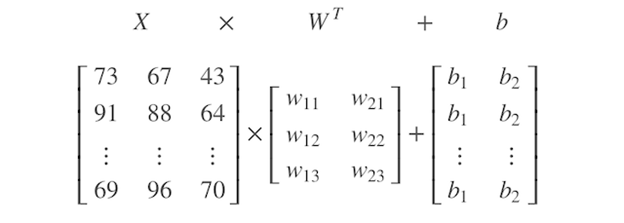

#### Medidas de erro do modelo

In [19]:
from sklearn.metrics import *

y_hat = modelo.predict(X_test) 

In [22]:
mean_absolute_error(y_test, y_hat)

0.5035304415524374

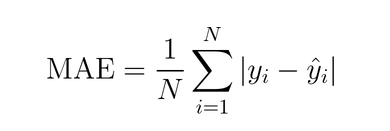

In [21]:
mean_squared_error(y_test, y_hat)

0.3900251439639545

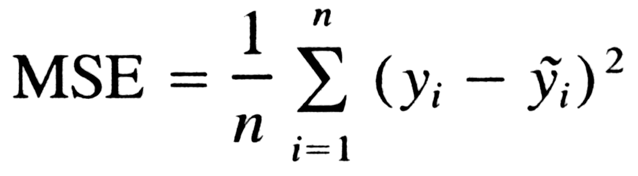

In [20]:
import numpy as np

np.sqrt(mean_squared_error(y_test, y_hat))

0.6245199307980126

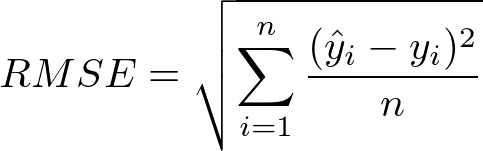

In [23]:
r2_score(y_test,y_hat)

0.40318034127962266

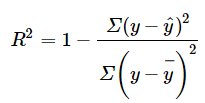

### Prevendo novos dados

In [24]:
novo_vinho = [[11.2 ,	0.28,	0.56	,1.9,	0.075,	17.0,	60.0	,0.9980	,3.16,	0.58,	9.8]]

In [26]:
print("A qualidade estimada do vinho acima é: %s" %modelo.predict(novo_vinho)[0])

A qualidade estimada do vinho acima é: 5.683871544946651


### Regressões Lineares - Visualização

In [28]:
#separando algumas features
analise = dados[['fixed acidity','density']]

In [29]:
analise.corr()

fixed acidity   density
fixed acidity       1.000000  0.668047
density             0.668047  1.000000

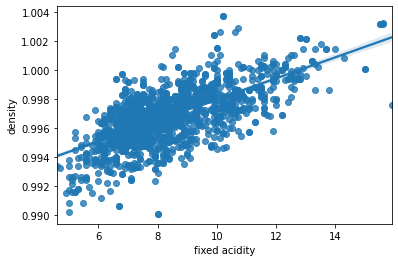

In [30]:
sns.regplot(x="fixed acidity", y="density", data=dados);

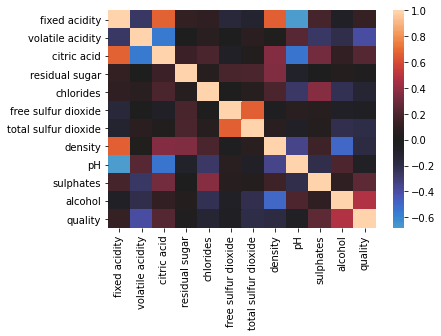

In [35]:
ax = sns.heatmap(dados.corr(), center=0)